In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [114]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [115]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [116]:
df.duplicated().sum()

0

In [117]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [118]:
df['Geography'].value_counts() # imbalanced because France is huge

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [119]:
df['Gender'].value_counts() # balanced data

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [120]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [121]:
# categorical encodding for Geography and Gender
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [122]:
from sklearn.model_selection import train_test_split

# train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [123]:
# scalling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

# Building the Model using Tensflow Keras

In [124]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [125]:
# create the architecture
model = Sequential()

model.add(Dense(3, activation='sigmoid', input_dim=11))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [127]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [128]:
# train the model
model.fit(X_train_scaled, y_train, epochs=10)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6120
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5005
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4719
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4543
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4548
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4483
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4323
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4325
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4204
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4416


In [129]:
# see the weights and bias of any layer
model.layers[0].get_weights()

[array([[-0.47230768, -0.06147044,  0.00348859],
        [ 0.70578474, -0.81450844, -1.9522505 ],
        [-0.44616312, -0.17260118,  0.03875047],
        [ 0.04695877, -0.15015137, -0.13623855],
        [-0.8522771 ,  0.05172845,  0.02888846],
        [ 0.06421003,  0.01950999,  0.07994359],
        [-0.6772742 ,  0.82215804,  0.37556818],
        [ 0.1524178 , -0.20723043,  0.24181108],
        [ 0.09789095, -0.79976606, -0.3500097 ],
        [ 0.27415353,  0.1692246 , -0.10226229],
        [-0.4507641 ,  0.5050215 ,  0.12595549]], dtype=float32),
 array([-0.5048308 ,  0.43899316,  0.42801082], dtype=float32)]

In [130]:
# predict
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.11447746],
       [0.13462165],
       [0.12402239],
       ...,
       [0.05669338],
       [0.13272637],
       [0.37423334]], dtype=float32)

In [131]:
# convert to 0 and 1 value by threshould
y_pred = np.where(y_log > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [132]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.82

# How to improve the accuracy? by experiments below techniques
* Add more epochs like 100
* Change activation to ReLU
* Add more nodes in hidden layer
* Add more hidden layers

In [133]:
modelUpdated = Sequential()
modelUpdated.add(Dense(11, activation='relu', input_dim=11))
modelUpdated.add(Dense(11, activation='relu'))
modelUpdated.add(Dense(1, activation='sigmoid'))

modelUpdated.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

results = modelUpdated.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)
# store all graph into results variable

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7429 - loss: 0.5968 - val_accuracy: 0.7975 - val_loss: 0.4986
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4772 - val_accuracy: 0.7981 - val_loss: 0.4545
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8015 - loss: 0.4412 - val_accuracy: 0.8125 - val_loss: 0.4349
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.4269 - val_accuracy: 0.8219 - val_loss: 0.4263
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8287 - loss: 0.4154 - val_accuracy: 0.8188 - val_loss: 0.4187
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.4035 - val_accuracy: 0.8263 - val_loss: 0.4109
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8275 - loss: 0.4166 - val_accuracy: 0.8294 - val_loss: 0.4046
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8407 - loss: 0.3947 - val_accuracy: 0.8344

In [134]:
# see the above problem is overfitting, because while training time 
#accuracy is 0.8787, loss=0.3088 but validation time accuracy=0.8550, loss=0.3483

In [135]:
from sklearn.metrics import accuracy_score

y_log = modelUpdated.predict(X_test_scaled)
y_pred = np.where(y_log > 0.5, 1, 0)

accuracy_score(y_test, y_pred) # 0.8595 accuracy is improved

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.865

## show the results into graph

In [139]:
results.history

{'accuracy': [0.7831249833106995,
  0.7973437309265137,
  0.8071874976158142,
  0.8239062428474426,
  0.8276562690734863,
  0.8326562643051147,
  0.8389062285423279,
  0.8407812714576721,
  0.8453124761581421,
  0.8501562476158142,
  0.848437488079071,
  0.8543750047683716,
  0.8578125238418579,
  0.859375,
  0.8595312237739563,
  0.8604687452316284,
  0.8621875047683716,
  0.8623437285423279,
  0.8606250286102295,
  0.8629687428474426,
  0.8617187738418579,
  0.8629687428474426,
  0.8617187738418579,
  0.8634374737739563,
  0.8642187714576721,
  0.862500011920929,
  0.8642187714576721,
  0.8620312213897705,
  0.8626562356948853,
  0.8651562333106995,
  0.8626562356948853,
  0.8615624904632568,
  0.8643749952316284,
  0.8629687428474426,
  0.862500011920929,
  0.8639062643051147,
  0.8631250262260437,
  0.8628125190734863,
  0.8629687428474426,
  0.8643749952316284,
  0.8654687404632568,
  0.8639062643051147,
  0.8626562356948853,
  0.8645312786102295,
  0.8646875023841858,
  0.8631250

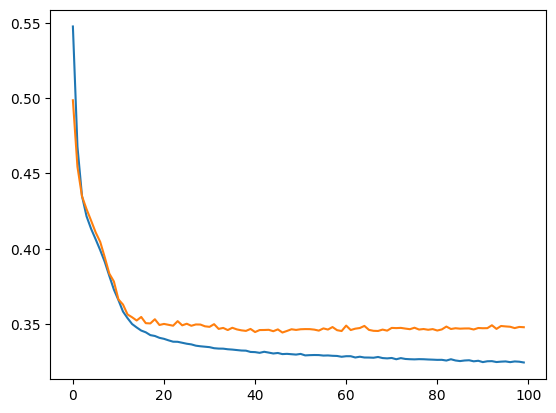

In [141]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
 

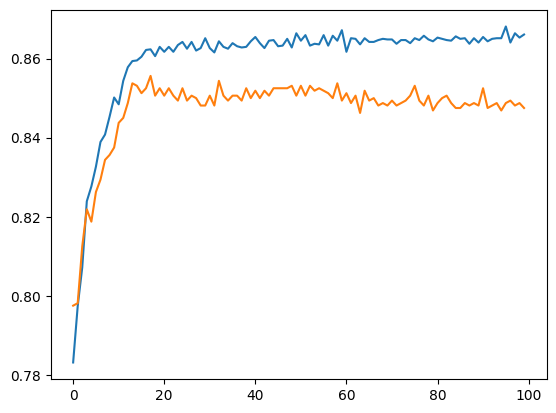

In [142]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])